In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from astropy.io.votable import parse

In [16]:
fits = fits.open('gaia4_9_2-result.fits')
table = fits[1].data

In [17]:
fits[1].columns

ColDefs(
    name = 'teff_gspphot'; format = 'E'; unit = 'K'
    name = 'lum_flame'; format = 'E'; unit = 'solLum'
    name = 'random_index'; format = 'K'
    name = 'bp_rp'; format = 'E'; unit = 'mag'
    name = 'distance_gspphot'; format = 'E'; unit = 'pc'
    name = 'mg_gspphot'; format = 'E'; unit = 'mag'
)

In [58]:
data = fits[1].data
df = pd.DataFrame(data)

In [239]:
temp = df['teff_gspphot']
lum = df['lum_flame']
bprp = df['bp_rp']
absmag = df['mg_gspphot']

x, y = np.meshgrid(np.linspace(-2,6,41), np.linspace(-6,16,111))

# color_mag = len(df[(bprp in x) & (absmag in y)])
x

array([[-2. , -1.8, -1.6, ...,  5.6,  5.8,  6. ],
       [-2. , -1.8, -1.6, ...,  5.6,  5.8,  6. ],
       [-2. , -1.8, -1.6, ...,  5.6,  5.8,  6. ],
       ...,
       [-2. , -1.8, -1.6, ...,  5.6,  5.8,  6. ],
       [-2. , -1.8, -1.6, ...,  5.6,  5.8,  6. ],
       [-2. , -1.8, -1.6, ...,  5.6,  5.8,  6. ]])

In [254]:
y

array([[-6. , -6. , -6. , ..., -6. , -6. , -6. ],
       [-5.8, -5.8, -5.8, ..., -5.8, -5.8, -5.8],
       [-5.6, -5.6, -5.6, ..., -5.6, -5.6, -5.6],
       ...,
       [15.6, 15.6, 15.6, ..., 15.6, 15.6, 15.6],
       [15.8, 15.8, 15.8, ..., 15.8, 15.8, 15.8],
       [16. , 16. , 16. , ..., 16. , 16. , 16. ]])

In [253]:
z = np.empty([len(x), len(x[0])])
np.info(z)

class:  ndarray
shape:  (111, 41)
strides:  (328, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x140780000
byteorder:  little
byteswap:  False
type: float64


In [256]:
z = x + y
z

array([[-8.0000000e+00, -7.8000000e+00, -7.6000000e+00, ...,
        -4.0000000e-01, -2.0000000e-01,  0.0000000e+00],
       [-7.8000000e+00, -7.6000000e+00, -7.4000000e+00, ...,
        -2.0000000e-01,  8.8817842e-16,  2.0000000e-01],
       [-7.6000000e+00, -7.4000000e+00, -7.2000000e+00, ...,
         8.8817842e-16,  2.0000000e-01,  4.0000000e-01],
       ...,
       [ 1.3600000e+01,  1.3800000e+01,  1.4000000e+01, ...,
         2.1200000e+01,  2.1400000e+01,  2.1600000e+01],
       [ 1.3800000e+01,  1.4000000e+01,  1.4200000e+01, ...,
         2.1400000e+01,  2.1600000e+01,  2.1800000e+01],
       [ 1.4000000e+01,  1.4200000e+01,  1.4400000e+01, ...,
         2.1600000e+01,  2.1800000e+01,  2.2000000e+01]])

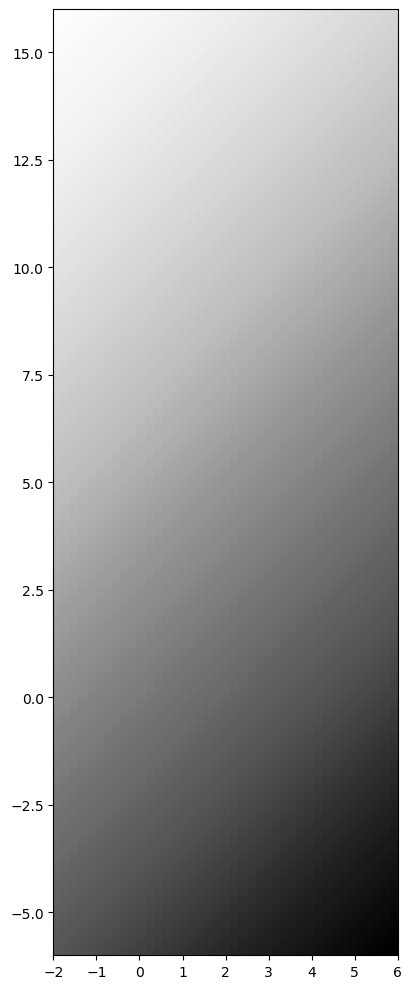

In [257]:
fig, axs = plt.subplots(figsize=(10,10))
axs.imshow(z, cmap='Greys', extent=[-2,6,-6,16])
plt.tight_layout()

In [205]:
def f(x, y, xspace, yspace, df):
    count = 0
    result = np.empty([len(xspace), len(xspace[0])])
    for i in np.arange(0, len(df[:])-1):
        for j in np.arange(0, len(x[0])-2):
            for k in np.arange(0, len(y[0])-2):
                if bprp[i]>=x[0][j] and bprp[i]<=x[0][j+1] and absmag[i]>=y[k][0] and absmag[i]>=y[k+1][0]:
                    count+=1
                else:
                    count=count
        result

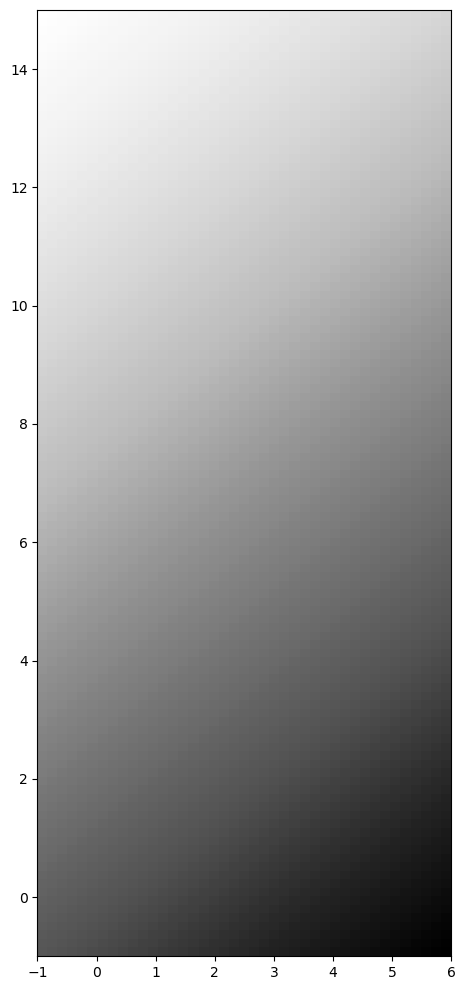

In [229]:
fig, axs = plt.subplots(figsize=(10,10))
axs.imshow(z, cmap='Greys', extent=[-1,6,-1,15])
plt.tight_layout()